In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [215]:
titanic = pd.read_csv('titanic.csv')

In [216]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [217]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:>

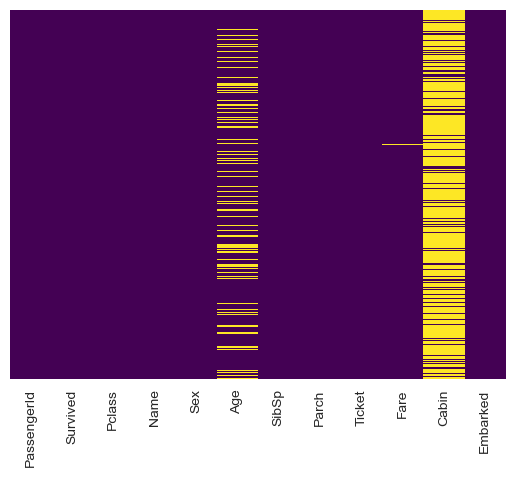

In [218]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

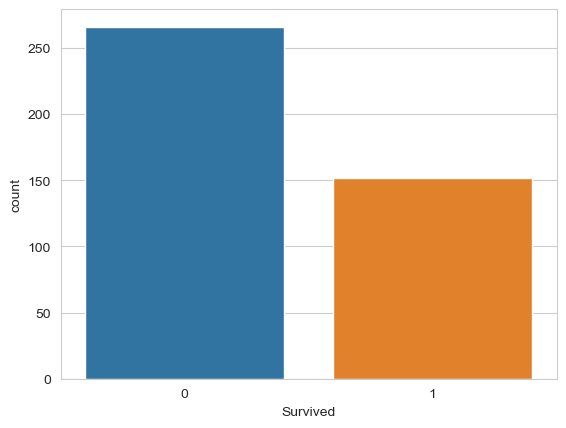

In [219]:
sns.countplot(x = 'Survived', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

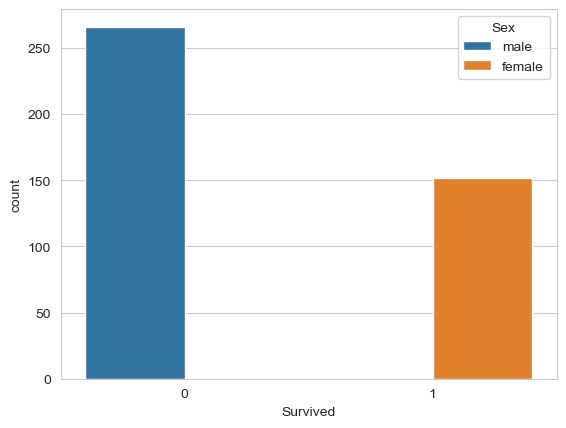

In [220]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

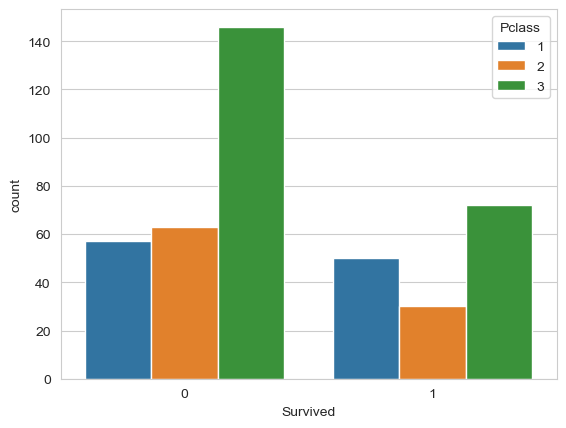

In [221]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

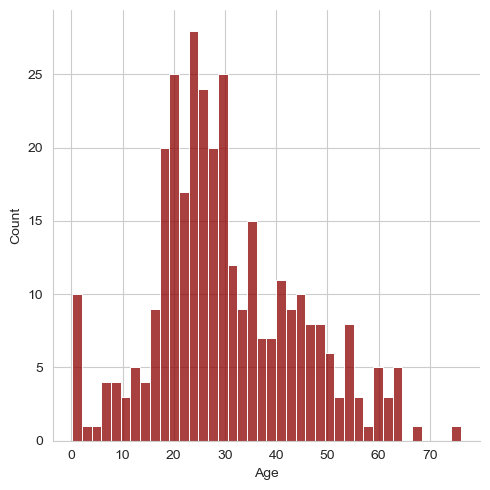

In [222]:
sns.displot(titanic['Age'].dropna(), kde=False, color='darkred', bins=40)

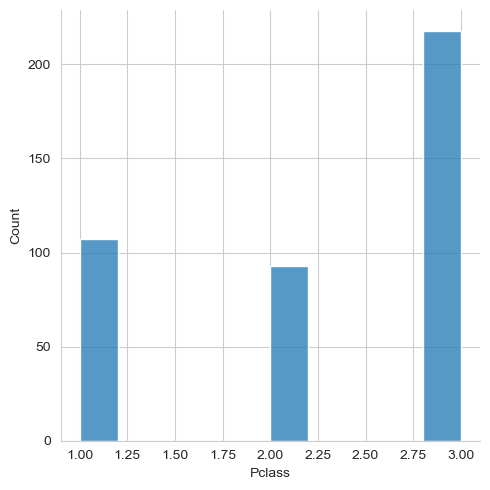

In [223]:
sns.displot(titanic['Pclass'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

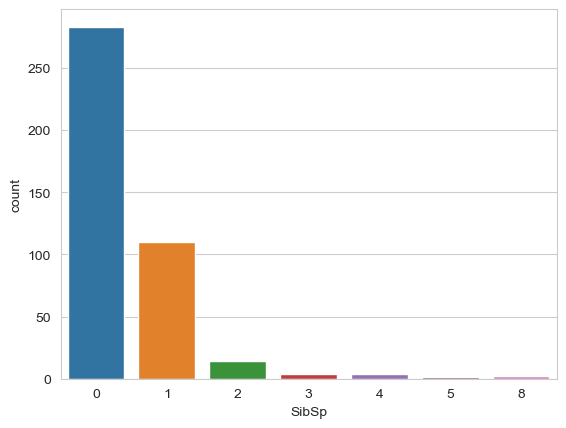

In [224]:
sns.countplot(x='SibSp', data=titanic)

<AxesSubplot:>

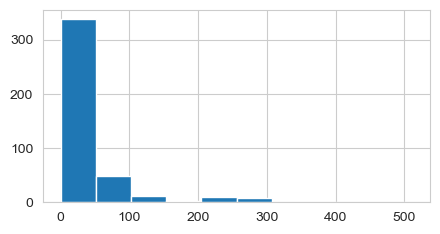

In [225]:
titanic['Fare'].hist(figsize=(5,2.5))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

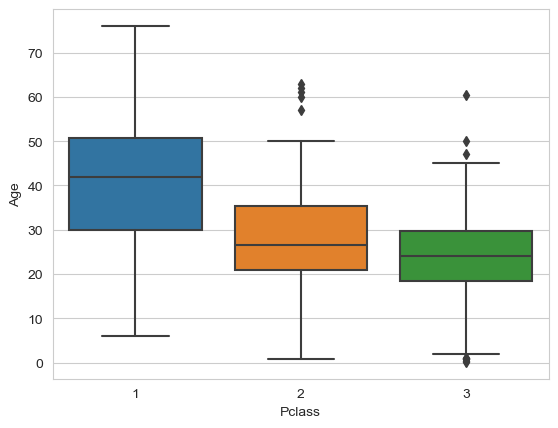

In [226]:
sns.boxplot(x='Pclass', y = 'Age', data=titanic)

##### The average age of 
- 1st class is around 42
- 2nd class is around 28
- 3rd class is around 25
- we fill in the null values with the average age. 


In [227]:
def avg_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age

###### 5 is 'Age' and 3 is 'Pclass' in the data

In [228]:
titanic['Age'] = titanic[['Age','Pclass']].apply(avg_age, axis=1)

<AxesSubplot:>

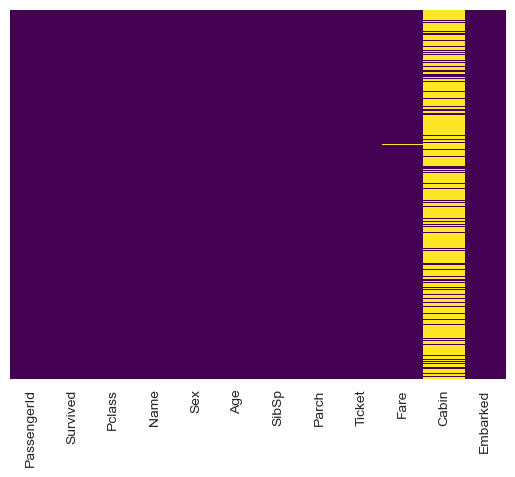

In [229]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# all the null values in age will be replaced.

###### cabin has so many null values. so we can drop the col. or we need to do feature engineering.



In [230]:
titanic.drop('Cabin', axis=1, inplace=True)

In [231]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


##### we need to replace sex with 0 and 1


In [232]:
titanic.dropna(inplace=True)

In [233]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)
sex = pd.get_dummies(titanic['Sex'], drop_first=True)


In [234]:
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [235]:
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [236]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [237]:
titanic.drop(['Sex','Embarked','Name', 'Ticket'], axis=1, inplace=True)

In [238]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [239]:
train = pd.concat([titanic, sex, embark], axis=1) #axis=1 performs the action/condition on columns, axis=0 performs on rows 

In [240]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


##### survived is a dependent feature and all other are independent features.

In [241]:
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [242]:
train['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

###### split the data into train and test data

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.30, random_state=101)

##### train and predicting the data

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
model = LogisticRegression(max_iter=5000)

In [247]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [248]:
predictions = model.predict(x_test)

In [249]:
from sklearn.metrics import confusion_matrix

In [250]:
accuracy = confusion_matrix(y_test, predictions)

In [251]:
accuracy

array([[65,  0],
       [ 0, 61]])

In [252]:
from sklearn.metrics import accuracy_score


In [253]:
accuracy = accuracy_score(y_test, predictions)

In [254]:
accuracy

1.0

In [255]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [256]:
y_test

358    0
141    1
385    1
214    1
139    0
      ..
16     0
31     0
36     1
41     0
24     1
Name: Survived, Length: 126, dtype: int64

In [257]:
np.array(y_test)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])